In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from sklearn.preprocessing import StandardScaler
import scipy.stats as stats
plt.style.use('bmh')

In [85]:
PIMA = pd.read_csv(r"E:\diabetes data\diabetes.csv")

In [86]:
PIMA

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [75]:
file = pd.DataFrame(PIMA)
file.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [76]:
file.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


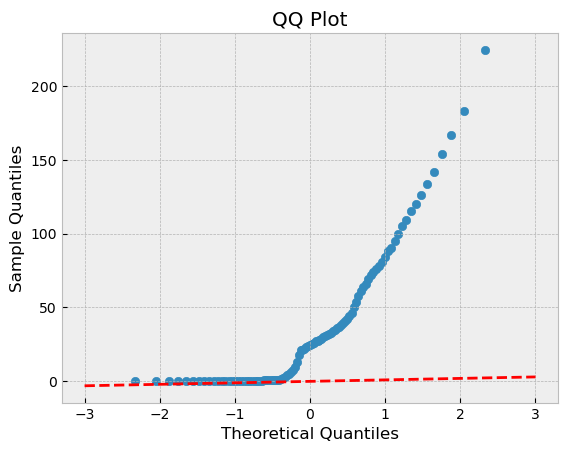

In [77]:
# 计算观察值的分位数
quantiles = np.percentile(file, np.linspace(0, 100, 101))

# 计算正态分布的理论分位数
theoretical_quantiles = stats.norm.ppf(np.linspace(0, 1, 101))

# 绘制QQ图
plt.scatter(theoretical_quantiles, quantiles)
plt.plot([-3, 3], [-3, 3], color='red', linestyle='--')  # 绘制参考直线
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.title('QQ Plot')
plt.show()


In [89]:
diabetes_data_copy = file.copy(deep = True)
diabetes_data_copy[['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']] = diabetes_data_copy[['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']].replace(0,np.NaN)

## showing the count of Nans
print(diabetes_data_copy.isnull().sum())

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


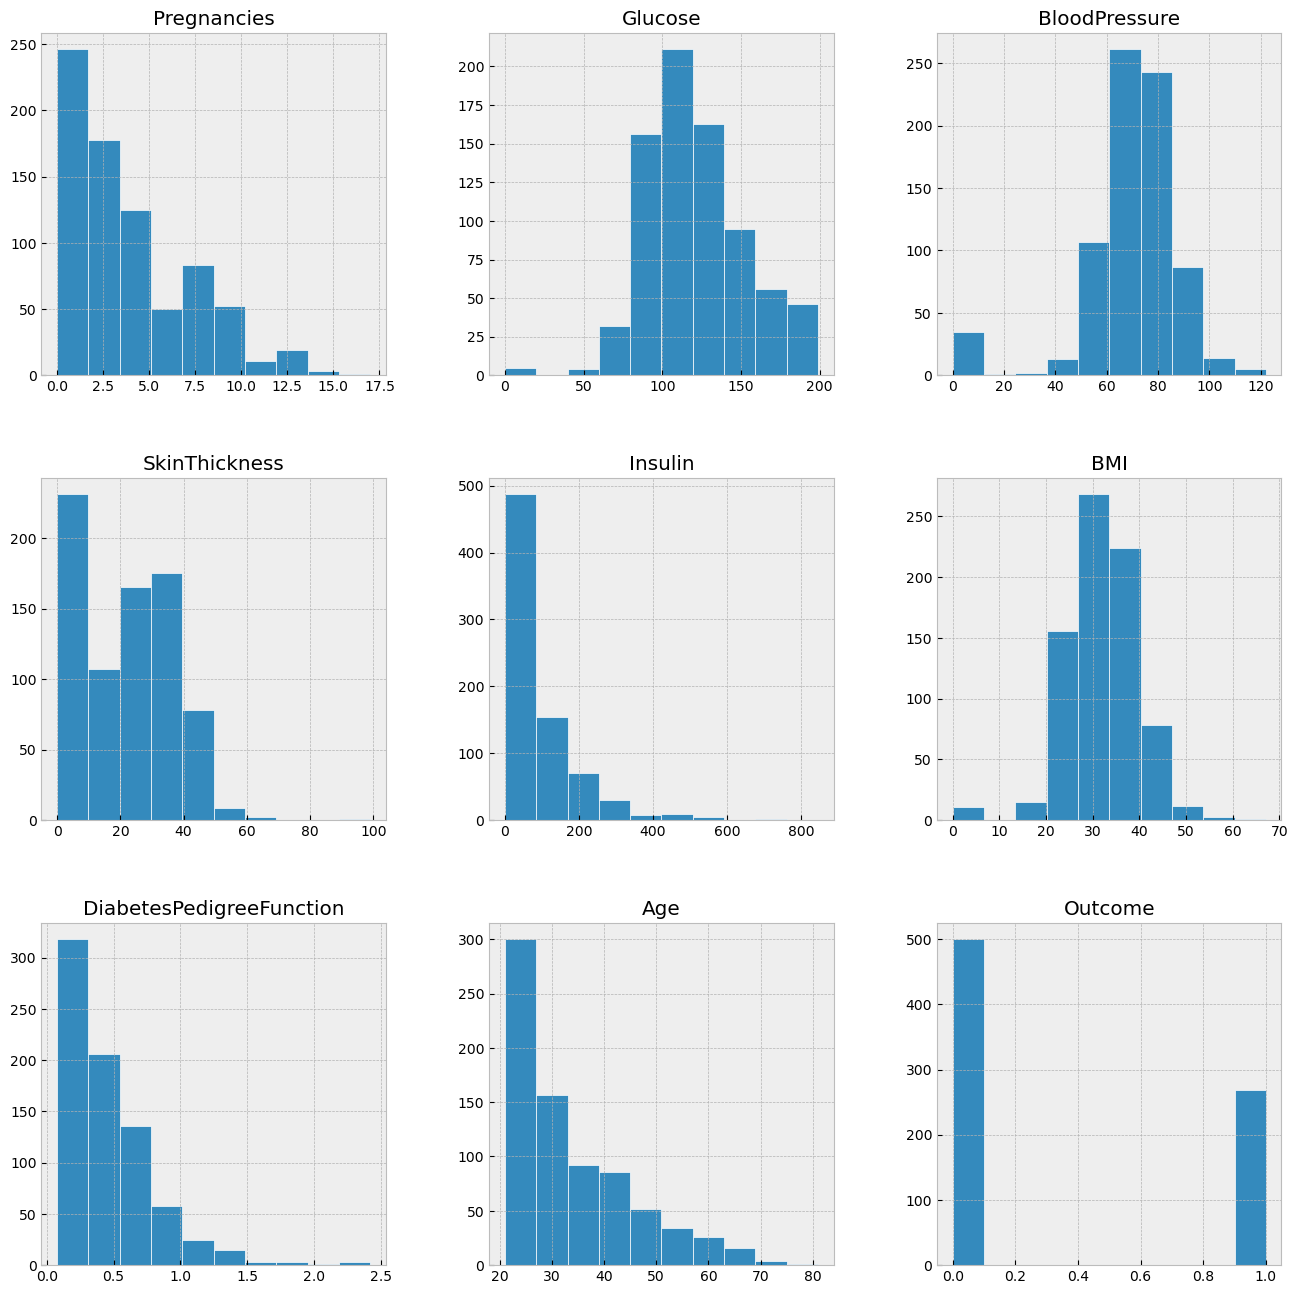

In [62]:
# plt.figure(figsize=(8, 8),dpi=350)
# %matplotlib auto
pa = file.hist(figsize = (16,16),edgecolor='white')

plt.show()

In [79]:
diabetes_data_copy['Glucose'].fillna(diabetes_data_copy['Glucose'].mean(), inplace = True)
diabetes_data_copy['BloodPressure'].fillna(diabetes_data_copy['BloodPressure'].mean(), inplace = True)
diabetes_data_copy['SkinThickness'].fillna(diabetes_data_copy['SkinThickness'].median(), inplace = True)
diabetes_data_copy['Insulin'].fillna(diabetes_data_copy['Insulin'].median(), inplace = True)
diabetes_data_copy['BMI'].fillna(diabetes_data_copy['BMI'].median(), inplace = True)

<Figure size 2800x2800 with 0 Axes>

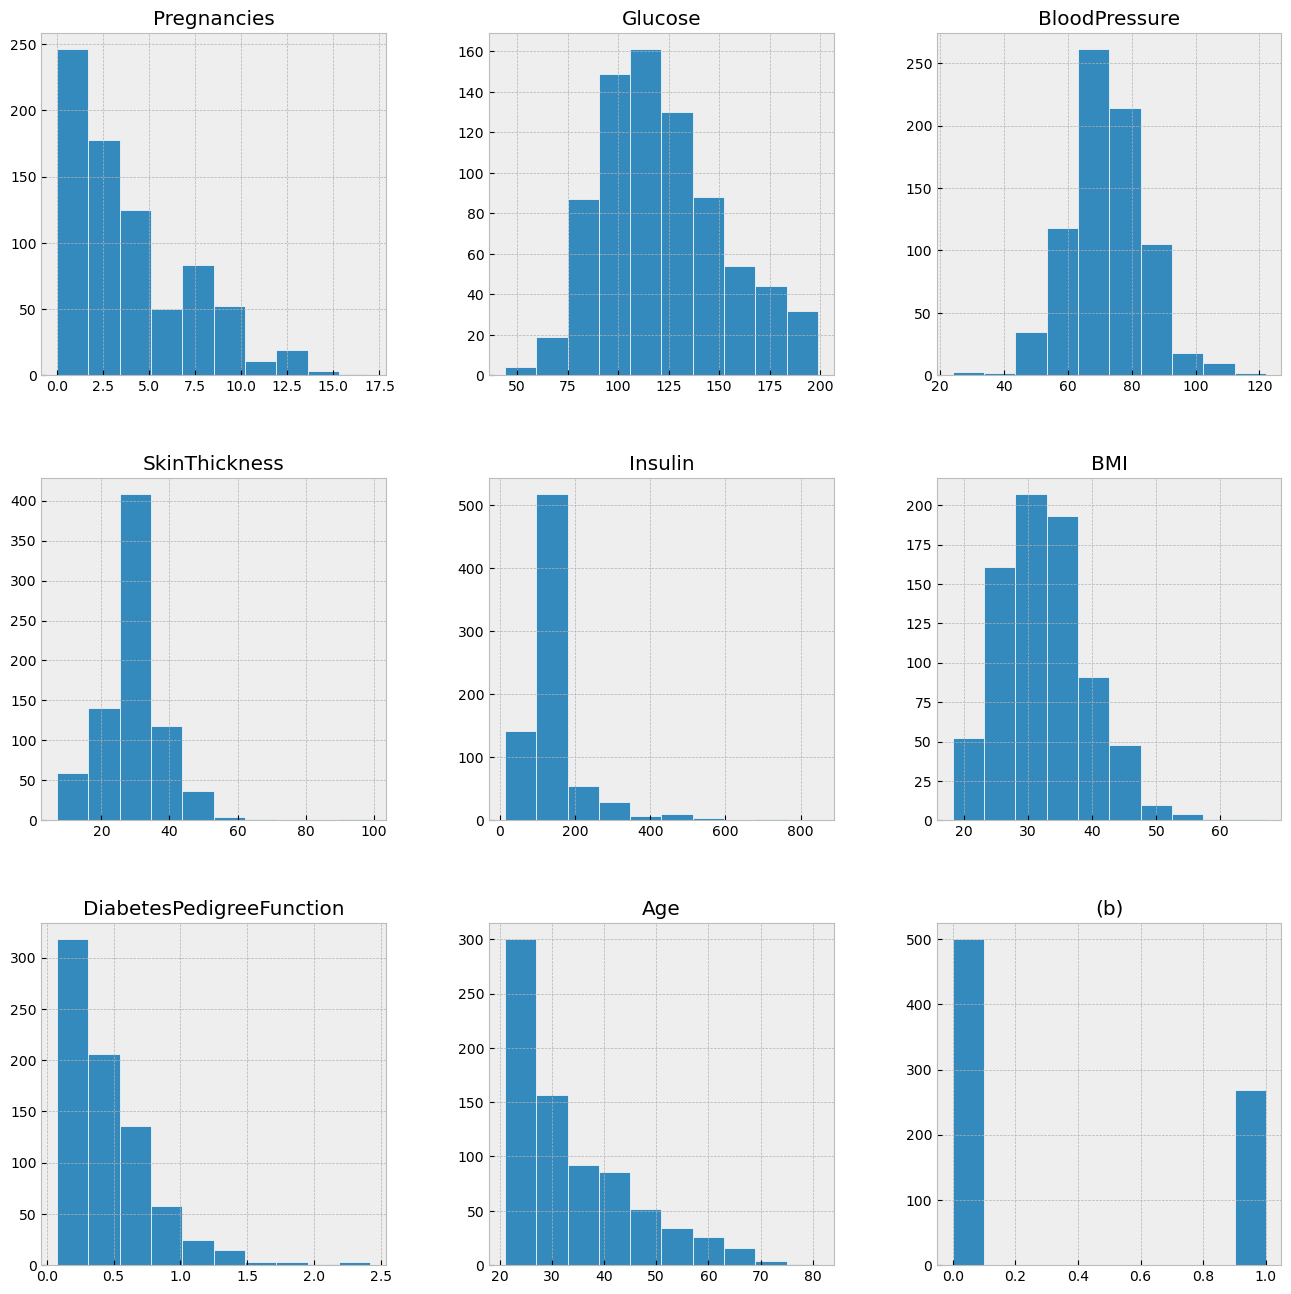

In [80]:
plt.figure(figsize=(8, 8),dpi=350)
pb = diabetes_data_copy.hist(figsize = (16,16),edgecolor="white")
plt.title('(b)')
plt.show()

In [82]:
print(diabetes_data_copy.isnull().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [65]:
# diabetes_data_copy.to_csv('after_imputed.csv')

0    500
1    268
Name: Outcome, dtype: int64


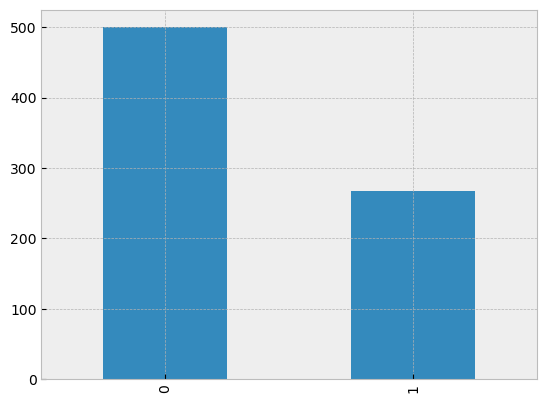

In [66]:
colors = file["Outcome"]
print(file.Outcome.value_counts())
p=file.Outcome.value_counts().plot(kind="bar")

#### 填充缺失值之前

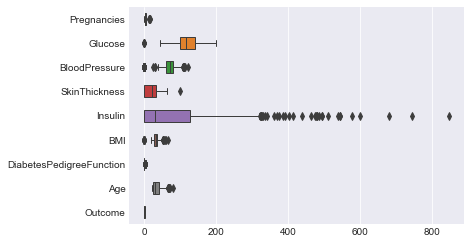

In [29]:
df = file
# df.set_index('Features',inplace=True)
p1 = sns.boxplot(data =file,orient='h',linewidth=1,width=0.5, fliersize=5)
plt.show()

#### 填充缺失值之后

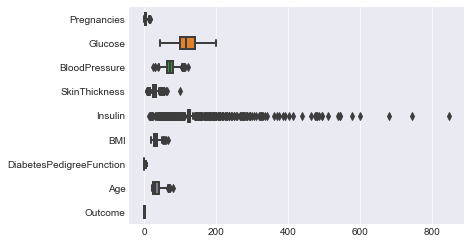

In [30]:
df = file
# df.set_index('Features',inplace=True)

p2 = sns.boxplot(data = diabetes_data_copy,orient='h',linewidth=2,width=0.5, fliersize=5)
plt.show()

In [16]:
# 对每个特征进行Anderson-Darling正态性检验
for i in range(df.shape[1]):
    feature = df.iloc[:, i]
    result = anderson(feature)
    print(f"Feature {i+1}:")
    print(f"Statistic: {result.statistic}")
    print(f"Critical Values: {result.critical_values}")
    print(f"Significance Levels: {result.significance_level}")
    print("")

Feature 1:
Statistic: 22.54569637154782
Critical Values: [0.573 0.653 0.783 0.913 1.086]
Significance Levels: [15.  10.   5.   2.5  1. ]

Feature 2:
Statistic: 5.965074622477118
Critical Values: [0.573 0.653 0.783 0.913 1.086]
Significance Levels: [15.  10.   5.   2.5  1. ]

Feature 3:
Statistic: 33.90093524860686
Critical Values: [0.573 0.653 0.783 0.913 1.086]
Significance Levels: [15.  10.   5.   2.5  1. ]

Feature 4:
Statistic: 24.61866692798776
Critical Values: [0.573 0.653 0.783 0.913 1.086]
Significance Levels: [15.  10.   5.   2.5  1. ]

Feature 5:
Statistic: 63.33202212543654
Critical Values: [0.573 0.653 0.783 0.913 1.086]
Significance Levels: [15.  10.   5.   2.5  1. ]

Feature 6:
Statistic: 4.1891562244597935
Critical Values: [0.573 0.653 0.783 0.913 1.086]
Significance Levels: [15.  10.   5.   2.5  1. ]

Feature 7:
Statistic: 29.134048005071463
Critical Values: [0.573 0.653 0.783 0.913 1.086]
Significance Levels: [15.  10.   5.   2.5  1. ]

Feature 8:
Statistic: 30.0278981

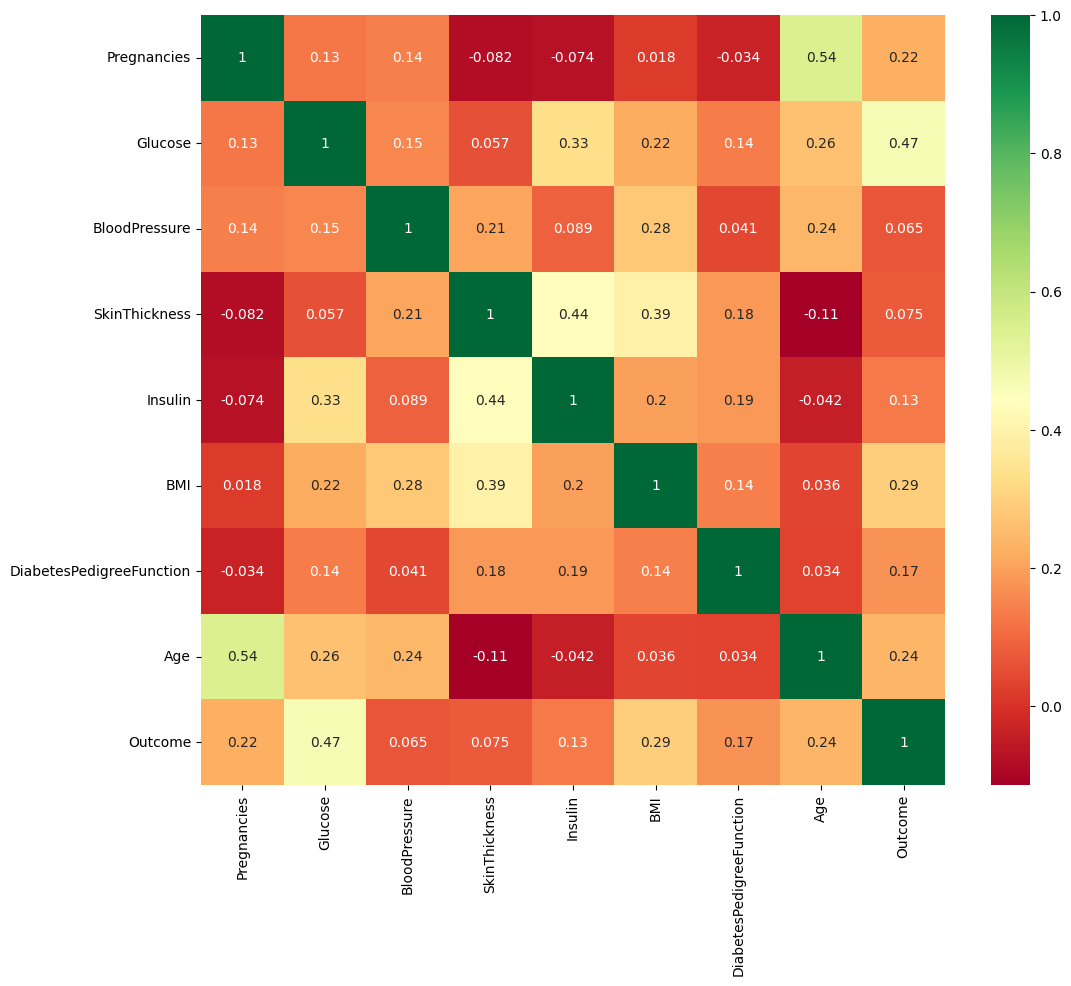

In [15]:
plt.figure(figsize=(12,10))  # on this line I just set the size of figure to 12 by 10.
p=sns.heatmap(file.corr(), annot=True,cmap ='RdYlGn')  # seaborn has very simple solution for heatmap

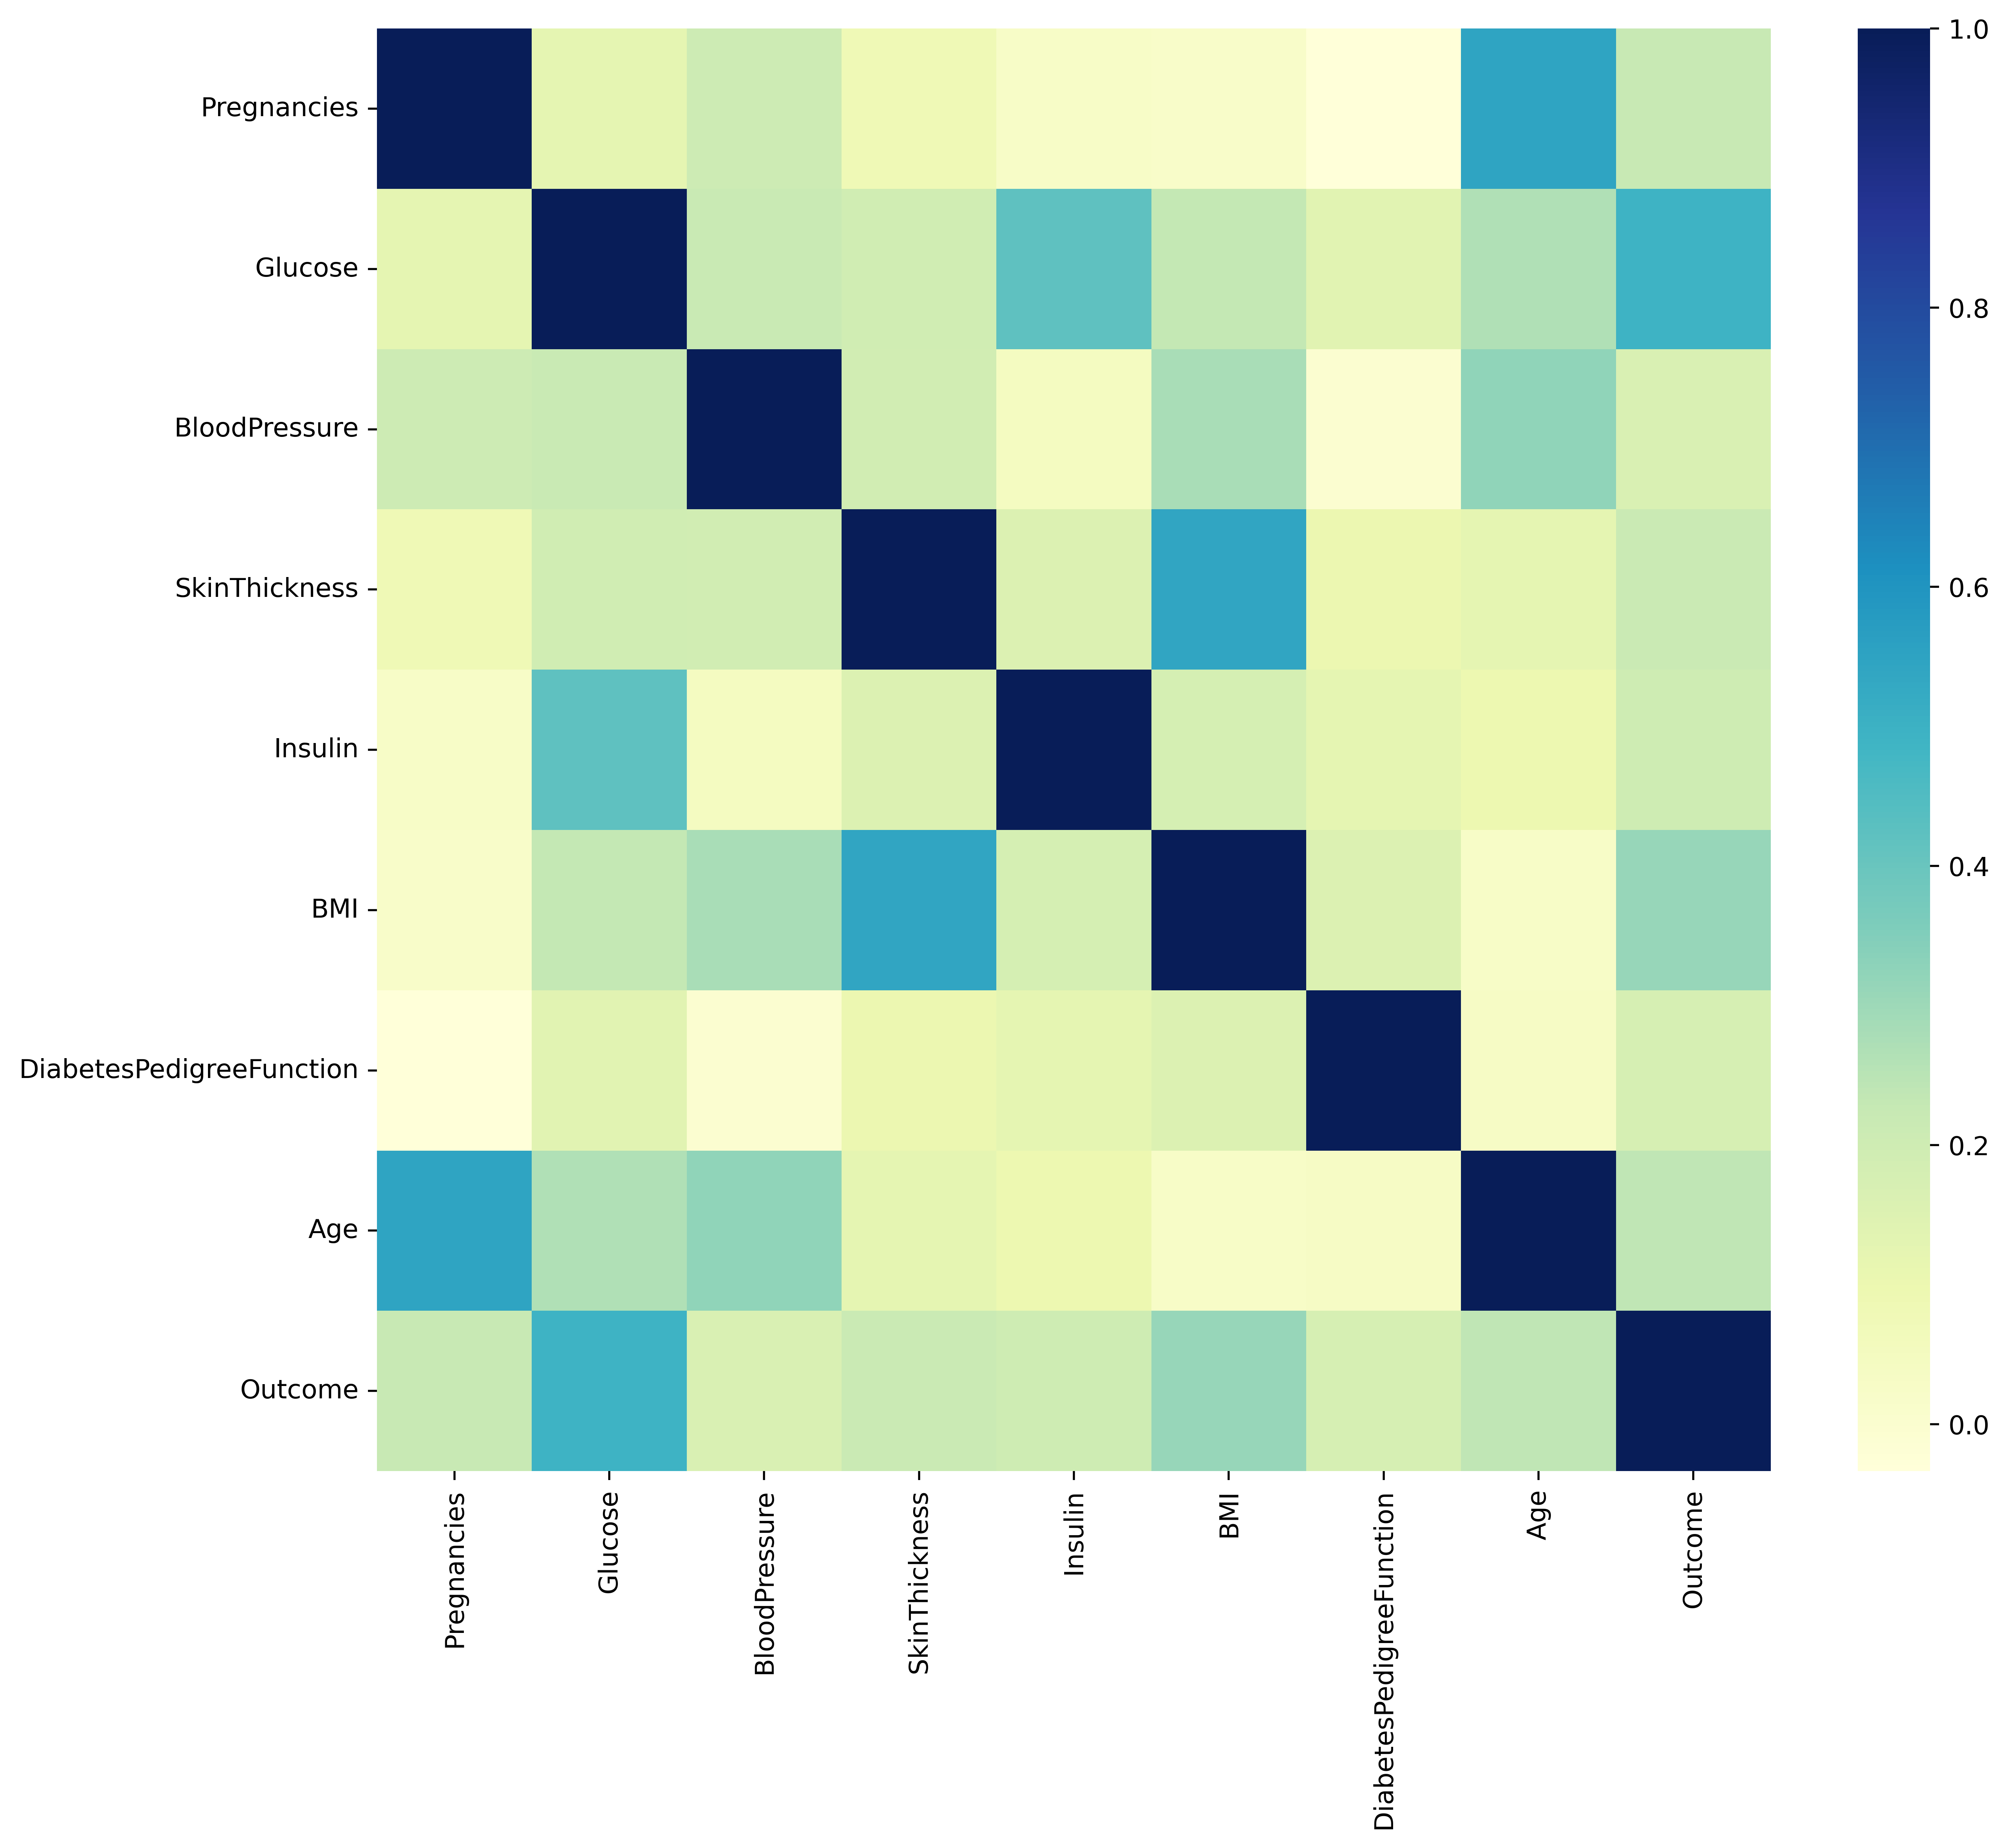

In [17]:
plt.figure(figsize=(12,10),dpi=500)  # on this line I just set the size of figure to 12 by 10.
p=sns.heatmap(diabetes_data_copy.corr(), annot=False,cmap ='YlGnBu',)  # seaborn has very simple solution for heatmap

In [16]:
def detect_outliers(df,n,features):
    outlier_indices = []
    # iterate over features(columns)
    for col in features:
        # 1st quartile (25%)
        Q1 = np.percentile(df[col], 25)
        # 3rd quartile (75%)
        Q3 = np.percentile(df[col],75)
        # Interquartile range (IQR)
        IQR = Q3 - Q1
        # outlier step
        outlier_step = 1.5 * IQR
        # Determine a list of indices of outliers for feature col
        outlier_list_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step )].index
        # append the found outlier indices for col to the list of outlier indices 
        outlier_indices.extend(outlier_list_col)
    # select observations containing more than 2 outliers
    outlier_indices = Counter(outlier_indices)        
    multiple_outliers = list( k for k, v in outlier_indices.items() if v > n )
    return multiple_outliers  

#### 删除异常值

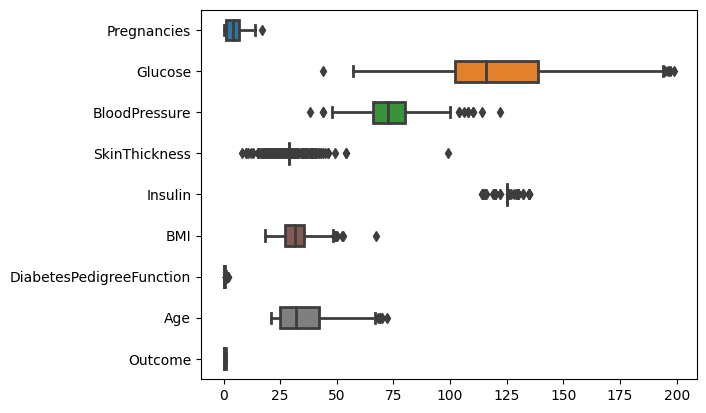

In [17]:
Outliers_to_drop=detect_outliers(diabetes_data_copy,0,['Insulin'])
after_del_outliers = diabetes_data_copy.drop(Outliers_to_drop, axis = 0).reset_index(drop=True)
p3 = sns.boxplot(data = after_del_outliers,orient='h',linewidth=2,width=0.5, fliersize=5)
plt.show()

In [18]:
after_del_outliers

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.000000,35.0,125.0,33.6,0.627,50,1
1,1,85.0,66.000000,29.0,125.0,26.6,0.351,31,0
2,8,183.0,64.000000,29.0,125.0,23.3,0.672,32,1
3,5,116.0,74.000000,29.0,125.0,25.6,0.201,30,0
4,10,115.0,72.405184,29.0,125.0,35.3,0.134,29,0
...,...,...,...,...,...,...,...,...,...
417,9,170.0,74.000000,31.0,125.0,44.0,0.403,43,1
418,9,89.0,62.000000,29.0,125.0,22.5,0.142,33,0
419,2,122.0,70.000000,27.0,125.0,36.8,0.340,27,0
420,1,126.0,60.000000,29.0,125.0,30.1,0.349,47,1


In [19]:
after_del_outliers.to_csv(r'E:\diabetes data\del_outliers.csv')

0    263
1    159
Name: Outcome, dtype: int64


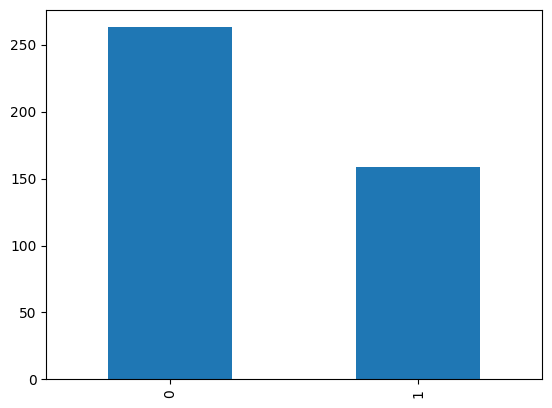

In [20]:
colors = after_del_outliers["Outcome"]
print(after_del_outliers.Outcome.value_counts())
p=after_del_outliers.Outcome.value_counts().plot(kind="bar")

#### 盖帽法处理异常值

In [21]:
# 盖帽法
# 传入数据表和待处理特征列
def train_add_hat(x, features):
    df = x.copy() # 复制表
    q95_dict = {} # 空字典
    for col in features: # 遍历特征列
        q95 = np.percentile(df[col], 95) # 95分位数
        q95_dict[col] = q95 # append至字典
        b = np.array(df[col]) # 转为数组
        c = list(map(lambda x:q95 if x > q95 else x, b)) # map一一处理
        df = df.drop(col, axis=1) # 删除列
        df[col] = c # 新增列
    # 返回处理后的数据表和处理字典
    return df, q95_dict

# 使用同一标准处理测试集
def add_hat(x, features, q95_dict):
    df = x.copy()
    len_d = len(df.index)  # 测试集大小
    for col in features:
        q95 = q95_dict[col]
        b = np.array(df[col])
        c = list(map(lambda x:q95 if x > q95 else x, b))
        df = df.drop(col, axis=1)
        df[col] = c
    return df


In [22]:
after_hat1,q95 = train_add_hat(diabetes_data_copy,['Insulin'])

In [23]:
# after_hat1.to_csv('afeter_hat.csv')

In [24]:
q95

{'Insulin': 293.0}

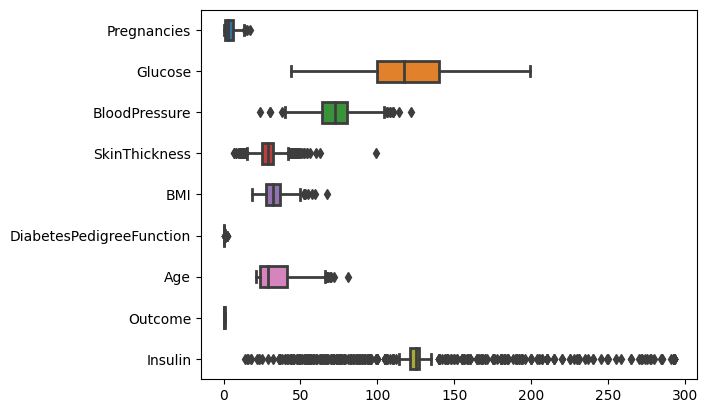

In [25]:
p = sns.boxplot(data = after_hat1,orient='h',linewidth=2,width=0.5, fliersize=5)
plt.show()

In [26]:
after_hat = pd.read_csv('afeter_hat.csv')
after_hat.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35,125,33.6,0.627,50,1
1,1,85.0,66.0,29,125,26.6,0.351,31,0
2,8,183.0,64.0,29,125,23.3,0.672,32,1
3,1,89.0,66.0,23,94,28.1,0.167,21,0
4,0,137.0,40.0,35,168,43.1,2.288,33,1


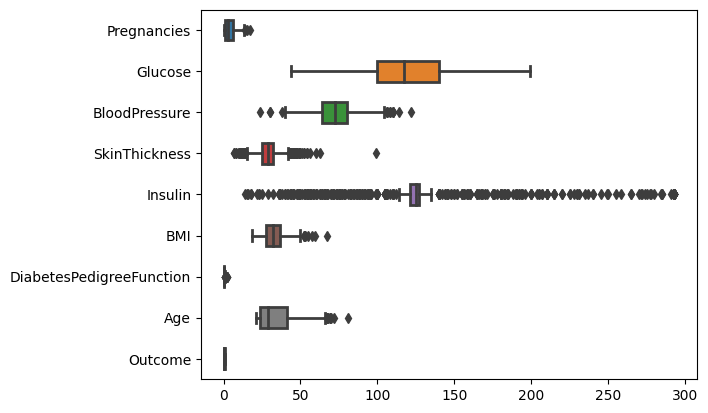

In [27]:
p4 = sns.boxplot(data = after_hat,orient='h',linewidth=2,width=0.5, fliersize=5)
plt.show()

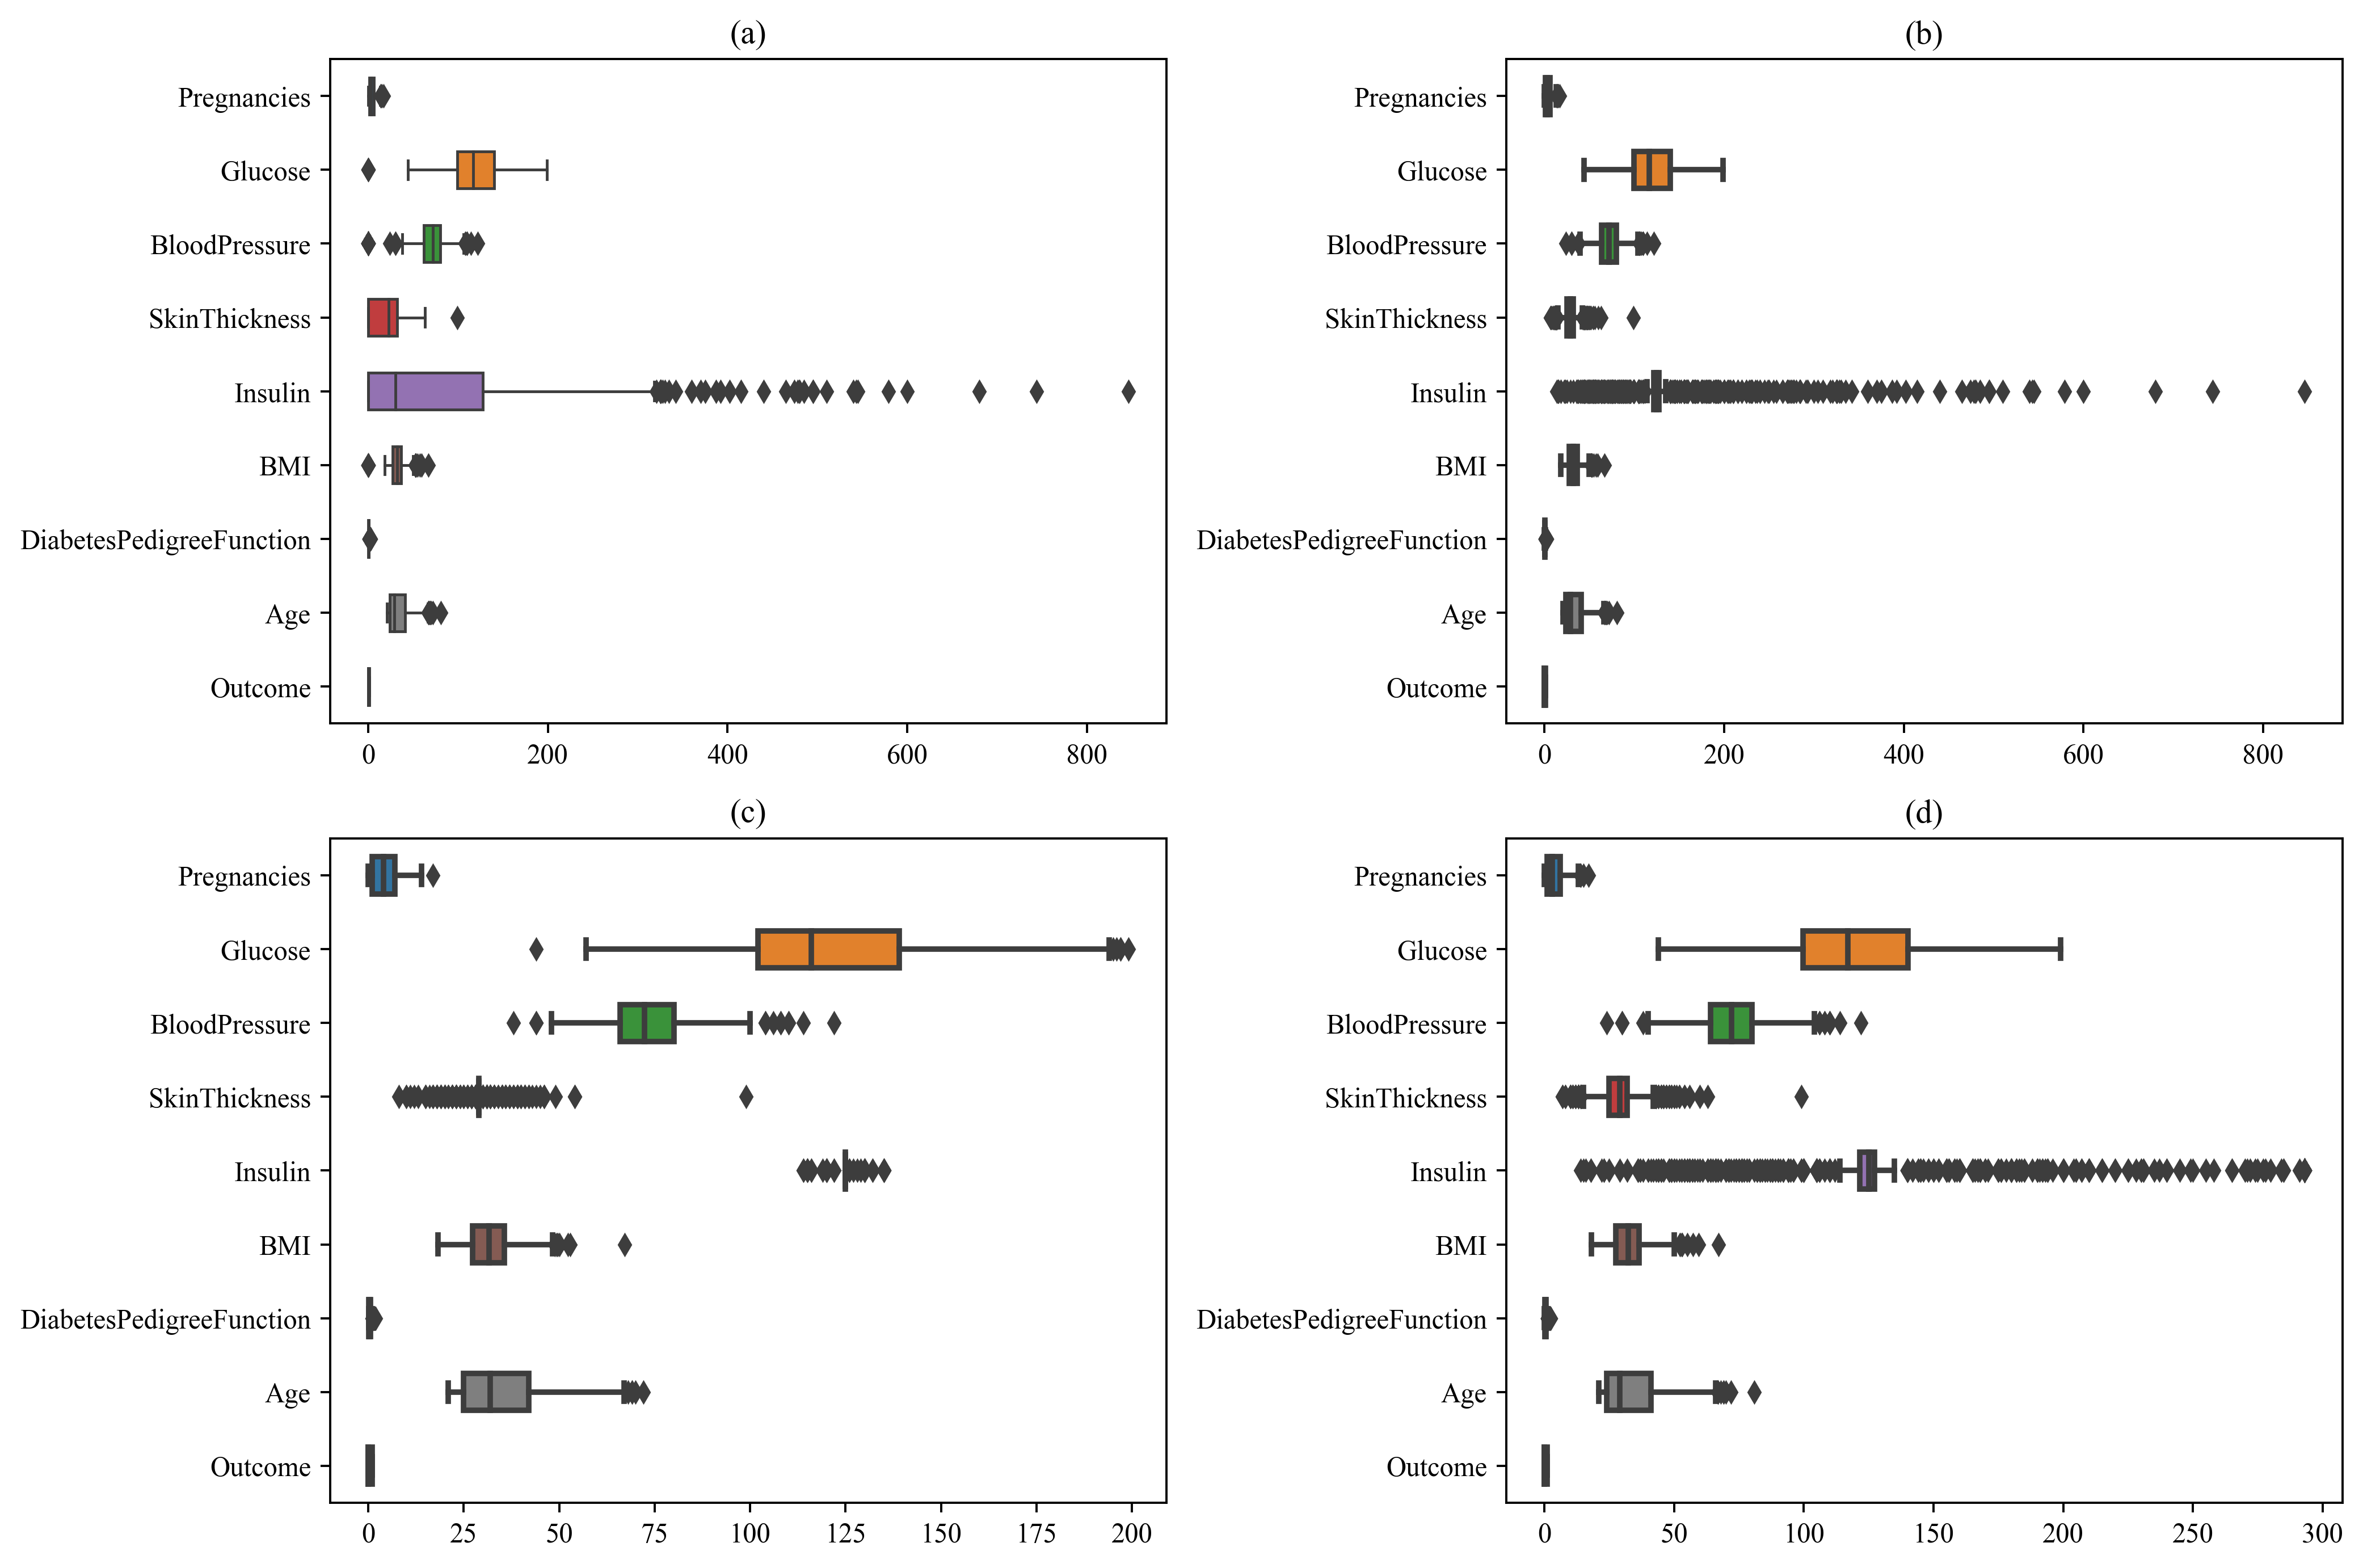

In [38]:
plt.rcParams['font.sans-serif'] = 'times new roman'
plt.figure(figsize=(12,8),dpi=350)
plt.subplot(2,2,1)
p1 = sns.boxplot(data =file,orient='h',linewidth=1,width=0.5, fliersize=5)
plt.title('(a)')
plt.subplot(2,2,2)
p2 = sns.boxplot(data = diabetes_data_copy,orient='h',linewidth=2,width=0.5, fliersize=5)
plt.title('(b)')
plt.subplot(2,2,3)
p3 = sns.boxplot(data = after_del_outliers,orient='h',linewidth=2,width=0.5, fliersize=5)
plt.title('(c)')
plt.subplot(2,2,4)
p4 = sns.boxplot(data = after_hat,orient='h',linewidth=2,width=0.5, fliersize=5)
plt.title('(d)')
plt.tight_layout()
plt.show()

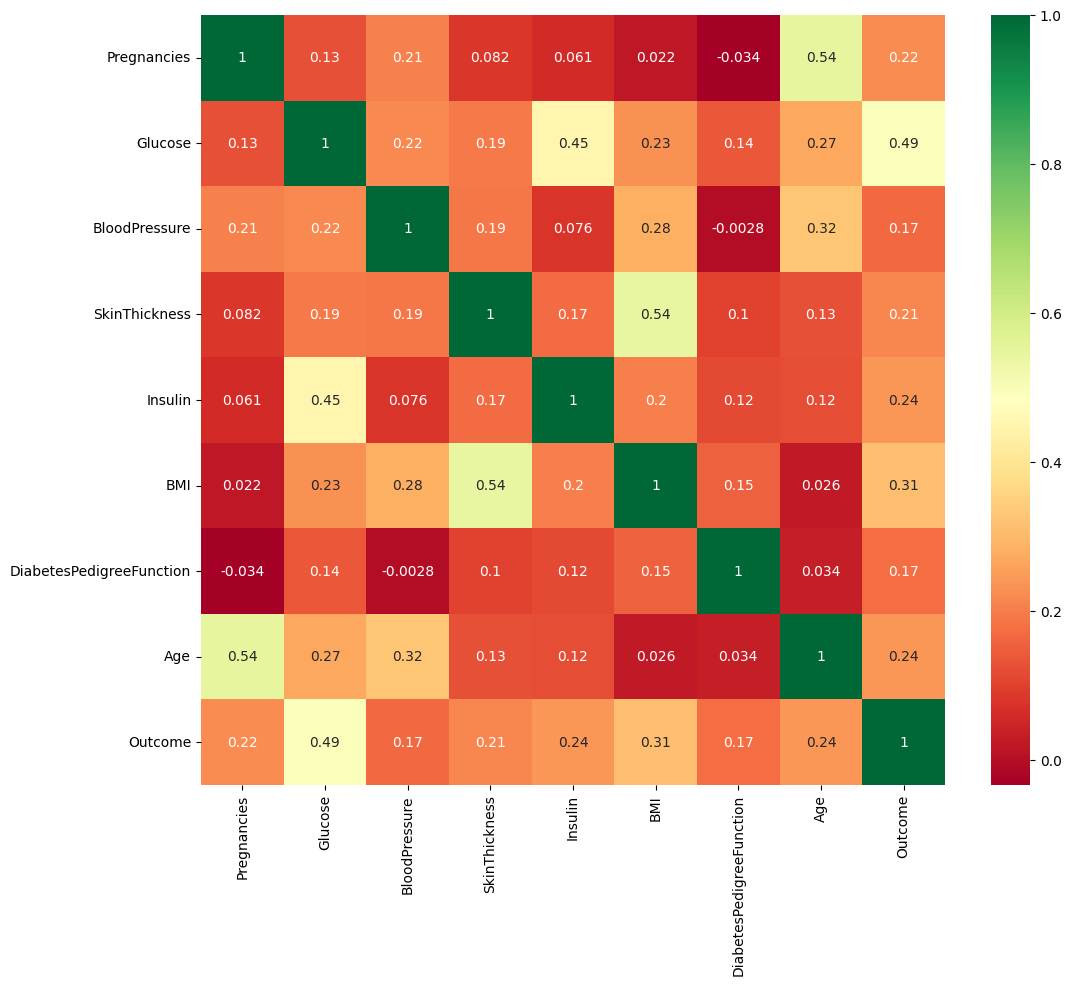

In [83]:
plt.figure(figsize=(12,10))  # on this line I just set the size of figure to 12 by 10.
p=sns.heatmap(after_hat.corr(), annot=True,cmap ='RdYlGn')  # seaborn has very simple solution for heatmap